In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import time
import sys
# Machine Learning model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
# Decomposition methods
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import TruncatedSVD

# Evaluation metrics
from sklearn.metrics import mean_squared_error


%matplotlib inline

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [3]:
data = pd.read_csv("MSFT_cleaned.csv", index_col=0, parse_dates=True)

In [4]:
# Let's take a brief look at the data
data.head()

,aroon_down,aroon_up,aroon_bandwidth,bbands_lower,bbands_upper,bbandwidth_100,cci,macd_hist,obv,rsi,...,sma_20,stoch,today_value,crudeoil_open,dollar_open,fedfund_open,gold_open,treasury_3_month,treasury_10_year,tomorrow_value
2020-02-21,28.0,72.0,44.0,162.1257,194.8923,18.355713,-76.5279,-0.6084,-82277387.0,53.7350,...,178.5090,58.2801,178.5900,52.42,99.380,98.920,1620.4,1.56,1.46,170.8900
2020-02-20,32.0,76.0,44.0,160.7458,195.0852,19.300960,31.8190,0.0418,-33677002.0,65.5450,...,177.9155,55.6603,184.4200,53.31,99.175,98.845,1610.9,1.58,1.52,178.5900
2020-02-19,36.0,80.0,44.0,159.2969,194.6621,19.982653,82.9352,0.3917,3185374.0,72.8372,...,176.9795,45.7500,187.2800,52.33,98.935,98.870,1601.8,1.58,1.56,184.4200
2020-02-18,40.0,84.0,44.0,158.3592,193.5218,19.985506,80.5154,0.5356,-26812097.0,72.7881,...,175.9405,37.7131,186.7215,52.19,98.765,98.845,1581.2,1.58,1.55,187.2800
2020-02-14,44.0,88.0,44.0,157.7529,192.1151,19.642951,60.9757,0.6365,-54665210.0,70.9531,...,174.9340,45.5241,184.8466,51.93,98.640,98.825,1577.5,1.58,1.59,186.7215


In [5]:
# Let's first split the data into training and test set
# We will keep the first 60% of the data as training and the remaining 20% as test data
training_row_num = int(len(data) * 0.6)
validation_row_num = int(len(data) * 0.8)
# We will take the earlier data as training data                       
training_data = data[::-1].iloc[:training_row_num, :]
validation_data = data[::-1].iloc[training_row_num:validation_row_num, :]
test_data = data[::-1].iloc[validation_row_num:, :]

In [6]:
training_data.head()

,aroon_down,aroon_up,aroon_bandwidth,bbands_lower,bbands_upper,bbandwidth_100,cci,macd_hist,obv,rsi,...,sma_20,stoch,today_value,crudeoil_open,dollar_open,fedfund_open,gold_open,treasury_3_month,treasury_10_year,tomorrow_value
2011-02-01,96.0,88.0,-8.0,27.6595,28.9733,4.639714,-117.1313,-0.1135,-818176296.0,48.6800,...,28.3164,33.5132,22.4306,99.24,78.130,99.46,1334.0,0.15,3.48,22.3885
2011-02-02,92.0,84.0,-8.0,27.6388,28.9793,4.735226,-78.0793,-0.1150,-864000296.0,47.9665,...,28.3091,24.0316,22.3885,99.84,77.500,99.29,1343.5,0.16,3.52,22.1561
2011-02-03,88.0,80.0,-8.0,27.5734,29.0097,5.076772,-120.5635,-0.1303,-924340396.0,44.1196,...,28.2916,21.6978,22.1561,101.09,77.615,99.25,1336.0,0.14,3.58,22.2523
2011-02-04,84.0,76.0,-8.0,27.5297,28.9484,5.023885,-102.9599,-0.1268,-883928196.0,46.0478,...,28.2391,25.4152,22.2523,100.47,78.345,99.18,1356.4,0.15,3.68,22.5949
2011-02-07,80.0,72.0,-8.0,27.5291,28.9088,4.889276,-14.4599,-0.0920,-814947296.0,52.3551,...,28.2189,34.3356,22.5949,99.27,78.485,99.14,1348.1,0.16,3.68,22.6630


In [7]:
validation_data.head()

,aroon_down,aroon_up,aroon_bandwidth,bbands_lower,bbands_upper,bbandwidth_100,cci,macd_hist,obv,rsi,...,sma_20,stoch,today_value,crudeoil_open,dollar_open,fedfund_open,gold_open,treasury_3_month,treasury_10_year,tomorrow_value
2016-07-08,68.0,0.0,-68.0,48.7941,52.4679,7.256029,122.1753,0.2330,-2.381113e+09,58.3957,...,50.6310,82.3821,48.7882,49.81,96.320,99.525,1364.2,0.28,1.37,49.0587
2016-07-11,64.0,100.0,36.0,48.6902,52.6828,7.877048,150.7356,0.2797,-2.358844e+09,59.9517,...,50.6865,83.7702,49.0587,49.90,96.410,99.485,1374.2,0.31,1.43,49.6371
2016-07-12,60.0,100.0,40.0,48.5806,53.0994,8.888277,160.0933,0.3350,-2.331527e+09,63.1270,...,50.8400,88.4492,49.6371,50.05,96.660,99.455,1358.7,0.29,1.53,49.9169
2016-07-13,56.0,100.0,44.0,48.5358,53.5122,9.753057,149.0667,0.3715,-2.306170e+09,64.5899,...,51.0240,90.4075,49.9169,51.26,96.595,99.460,1339.0,0.31,1.48,50.1315
2016-07-14,52.0,100.0,48.0,48.5532,53.8998,10.437176,135.3577,0.3890,-2.281624e+09,65.7131,...,51.2265,91.4455,50.1315,50.06,96.300,99.430,1348.1,0.32,1.53,50.0942


In [8]:
test_data.head()

,aroon_down,aroon_up,aroon_bandwidth,bbands_lower,bbands_upper,bbandwidth_100,cci,macd_hist,obv,rsi,...,sma_20,stoch,today_value,crudeoil_open,dollar_open,fedfund_open,gold_open,treasury_3_month,treasury_10_year,tomorrow_value
2018-05-01,16.0,92.0,76.0,90.2194,97.2086,7.458011,-14.5580,0.0212,-1.303528e+09,53.9364,...,93.7140,58.1759,92.1870,63.57,91.215,97.495,1316.0,1.85,2.97,90.7412
2018-05-02,12.0,88.0,76.0,90.3344,97.2116,7.333881,-45.2985,-0.0653,-1.330999e+09,49.9468,...,93.7730,52.8042,90.7412,62.74,91.820,97.455,1304.4,1.84,2.97,91.2846
2018-05-03,8.0,84.0,76.0,90.4774,97.2376,7.202621,-59.9571,-0.0858,-1.299857e+09,51.4018,...,93.8575,44.6083,91.2846,62.77,92.150,97.490,1305.5,1.84,2.94,92.3423
2018-05-04,4.0,80.0,76.0,91.1225,97.0855,6.336606,-15.1358,-0.0299,-1.277325e+09,54.1929,...,94.1040,37.4216,92.3423,63.28,91.830,97.500,1312.8,1.84,2.95,93.3709
2018-05-07,0.0,76.0,76.0,91.6812,97.0718,5.711803,93.2114,0.0692,-1.253083e+09,56.7917,...,94.3765,45.0150,93.3709,64.99,91.970,97.480,1316.3,1.86,2.95,92.9731


In [9]:
y_train = training_data.iloc[:, -1]
X_train = training_data.iloc[:, :-1]
y_validation = validation_data.iloc[:, -1]
X_validation = validation_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]

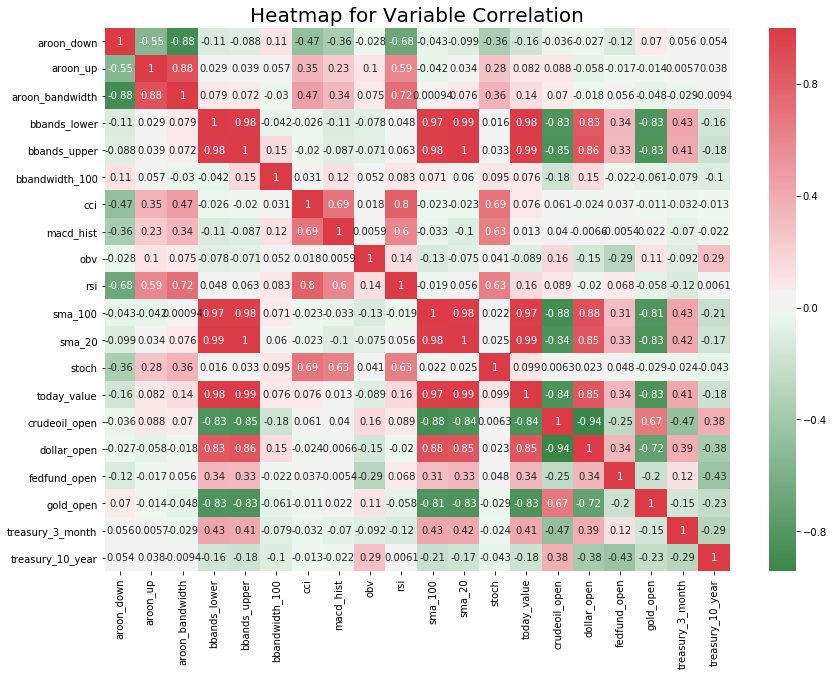

In [10]:
# Let's take a look at the correlations among variables to see if they might be correlated with each other

plt.subplots(figsize=(14,10))
cmap = sns.diverging_palette(133, 10, as_cmap=True)
sns.heatmap(X_train.corr(), cmap=cmap, annot=True)
plt.title("Heatmap for Variable Correlation", size = 20)
plt.savefig("var_heatmap.png")
plt.show()

It seems that some features are highly correlated with each other. If two values are highlt collinear, then knowing one variable will predict the other variable well.\
This is bad for building machine learning models, because the coefficients associated with that value become hard to predict

In [11]:
X_train.corr()

,aroon_down,aroon_up,aroon_bandwidth,bbands_lower,bbands_upper,bbandwidth_100,cci,macd_hist,obv,rsi,sma_100,sma_20,stoch,today_value,crudeoil_open,dollar_open,fedfund_open,gold_open,treasury_3_month,treasury_10_year
aroon_down,1.000000,-0.552702,-0.882560,-0.109955,-0.088065,0.108761,-0.468860,-0.363223,-0.027909,-0.676204,-0.043357,-0.098940,-0.358235,-0.163743,-0.036049,-0.026949,-0.115044,0.069956,0.055625,0.053666
aroon_up,-0.552702,1.000000,0.879647,0.029073,0.038653,0.056946,0.351285,0.226656,0.103942,0.594330,-0.042199,0.034276,0.277170,0.082382,0.088237,-0.058495,-0.016871,-0.013838,0.005720,0.037658
aroon_bandwidth,-0.882560,0.879647,1.000000,0.079157,0.072069,-0.029943,0.465786,0.335180,0.074573,0.721249,0.000936,0.075806,0.360834,0.139932,0.070358,-0.017623,0.056139,-0.047733,-0.028519,-0.009381
bbands_lower,-0.109955,0.029073,0.079157,1.000000,0.980328,-0.041948,-0.026309,-0.114045,-0.078140,0.048102,0.970350,0.994554,0.016365,0.984303,-0.825870,0.833513,0.335243,-0.826653,0.425034,-0.163256
bbands_upper,-0.088065,0.038653,0.072069,0.980328,1.000000,0.150988,-0.020478,-0.087327,-0.070557,0.062518,0.975023,0.995560,0.032973,0.988877,-0.851703,0.856212,0.328814,-0.831131,0.407709,-0.180264
bbandwidth_100,0.108761,0.056946,-0.029943,-0.041948,0.150988,1.000000,0.031333,0.121312,0.052064,0.083261,0.070968,0.059720,0.095179,0.076415,-0.176012,0.149433,-0.022384,-0.060871,-0.079418,-0.100100
cci,-0.468860,0.351285,0.465786,-0.026309,-0.020478,0.031333,1.000000,0.689526,0.017692,0.801809,-0.023338,-0.023360,0.692903,0.076261,0.060930,-0.023961,0.036506,-0.010989,-0.032116,-0.012728
macd_hist,-0.363223,0.226656,0.335180,-0.114045,-0.087327,0.121312,0.689526,1.000000,0.005896,0.601833,-0.033074,-0.100501,0.632010,0.012799,0.039724,-0.006577,-0.005403,0.021600,-0.070222,-0.022004
obv,-0.027909,0.103942,0.074573,-0.078140,-0.070557,0.052064,0.017692,0.005896,1.000000,0.140245,-0.127628,-0.074521,0.040779,-0.088728,0.157621,-0.153671,-0.287567,0.105420,-0.092358,0.293365
rsi,-0.676204,0.594330,0.721249,0.048102,0.062518,0.083261,0.801809,0.601833,0.140245,1.000000,-0.018597,0.055952,0.634726,0.156168,0.088932,-0.019508,0.068468,-0.058444,-0.118378,0.006074


In [12]:
# Let's find variable pairs that have high correlations
def create_corr_table(dataset):
    X_train_corr_table = dataset.corr()
    corr_var_pairs = {}
    for y in X_train_corr_table.columns:
        for x in X_train_corr_table.index:
            if (abs(X_train_corr_table.loc[x, y]) > 0.9) and x!=y:
                corr_var_pairs[(x, y)] = X_train_corr_table.loc[x, y]
    return corr_var_pairs

In [13]:
corr_var_pairs = create_corr_table(X_train)

In [14]:
corr_var_pairs_series = pd.Series(corr_var_pairs)

In [15]:
corr_var_pairs_series

bbands_upper   bbands_lower     0.980328
sma_100        bbands_lower     0.970350
sma_20         bbands_lower     0.994554
today_value    bbands_lower     0.984303
bbands_lower   bbands_upper     0.980328
sma_100        bbands_upper     0.975023
sma_20         bbands_upper     0.995560
today_value    bbands_upper     0.988877
bbands_lower   sma_100          0.970350
bbands_upper   sma_100          0.975023
sma_20         sma_100          0.977612
today_value    sma_100          0.972108
bbands_lower   sma_20           0.994554
bbands_upper   sma_20           0.995560
sma_100        sma_20           0.977612
today_value    sma_20           0.991582
bbands_lower   today_value      0.984303
bbands_upper   today_value      0.988877
sma_100        today_value      0.972108
sma_20         today_value      0.991582
dollar_open    crudeoil_open   -0.943217
crudeoil_open  dollar_open     -0.943217
dtype: float64

In [16]:
# It seems that bbands_lower and bbands_higher are correlated with many other variables
# Let's see what will happen if we remove bbands_upper and bbands_lower
pd.Series(create_corr_table(X_train.drop(["bbands_upper", "bbands_lower"], axis=1)))

sma_20         sma_100          0.977612
today_value    sma_100          0.972108
sma_100        sma_20           0.977612
today_value    sma_20           0.991582
sma_100        today_value      0.972108
sma_20         today_value      0.991582
dollar_open    crudeoil_open   -0.943217
crudeoil_open  dollar_open     -0.943217
dtype: float64

Now it seems that simple moving averages are strongly correlated with each other as well as with today's value, and dollar open values are strongly and negatively correlated with crudeoil open values

I will remove some features with very high correlation with other features


In [17]:
# Let's find feature importance with random forest regressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [18]:
variable_feature_importance = {}
for i in range(len(X_train.columns)):
    variable_feature_importance[X_train.columns[i]] = rf.feature_importances_[i]

In [19]:
# Let's look at the ordered feature importance of all variables currently available for the training set
pd.Series(variable_feature_importance).sort_values(ascending=False)

sma_20              0.423362
today_value         0.338303
sma_100             0.232520
bbands_upper        0.003354
crudeoil_open       0.000270
rsi                 0.000246
dollar_open         0.000221
bbands_lower        0.000186
bbandwidth_100      0.000176
obv                 0.000174
gold_open           0.000164
aroon_down          0.000152
fedfund_open        0.000133
cci                 0.000132
stoch               0.000124
treasury_10_year    0.000119
macd_hist           0.000104
treasury_3_month    0.000094
aroon_up            0.000091
aroon_bandwidth     0.000073
dtype: float64

From the result of the feature importance, it seems that aroon variables are not important features in terms of predicting the outcome. 
* Most relevant variables are yesterday values, simple moving averages, and upper bollinger bands
* aroon, cci, macd, stoch, rsi, crudeoil, treasury, bbandwidth, gold, dollar are the least relevant variables

In [20]:
# I will form a baseline model and see the rmse value for it
y_val_pred = rf.predict(X_validation)
print("root mean squared error: {}".format(np.sqrt(mean_squared_error(y_validation, y_val_pred))))

root mean squared error: 22.867430342836258


In [21]:
# Let's run another random forest model with fewer variables
kept_cols = ['today_value', 'sma_100', 'bbands_upper', 'sma_20', 'obv', 'bbands_lower',
               'bbandwidth_100', 'gold_open', 'stoch', 'treasury_10_year', 'rsi', 'macd_hist']
rf2 = RandomForestRegressor(random_state=0)
rf2.fit(X_train[kept_cols], y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [22]:
reduced_variable_feature_importance = {}
for i in range(len(kept_cols)):
    reduced_variable_feature_importance[kept_cols[i]] = rf2.feature_importances_[i]

In [23]:
pd.Series(reduced_variable_feature_importance).sort_values(ascending=False)

sma_20              0.432547
today_value         0.297755
sma_100             0.264272
bbands_upper        0.003380
rsi                 0.000388
obv                 0.000321
bbands_lower        0.000273
bbandwidth_100      0.000248
gold_open           0.000234
treasury_10_year    0.000202
stoch               0.000201
macd_hist           0.000180
dtype: float64

In [24]:
y_val_pred_reduced = rf2.predict(X_validation[kept_cols])
print("root mean squared error: {}".format(np.sqrt(mean_squared_error(y_validation, y_val_pred_reduced))))

root mean squared error: 22.95193249180074


The RMSE values for X_train with fewer rows are similar to RMSE values for X_train with all values.


#### Now here's the question. Is there any latent variables we are missing, and if we should resort to decomposition methods such as PCA, LDA, or Factor Analysis

We can iteratively test all these methods to see if they can yield a better rmse score than what we already achieved with the baseline model

In [25]:
# Let's build a function that iteratively spits out rmse score for predictions with PCA components

In [26]:
# Let's build a function that iteratively spits out rmse score for predictions with PCA components
def PCA_evaluation(X_train, y_train, X_validation, y_validation, model):
    var_num = len(X_train.columns) # Maximum number of components is equal to the number of variables
    rmse_scores = [] # to store the rmse values
    for n_components in range(1, var_num+1):
        pca = PCA(n_components = n_components, random_state = 0)
        X_train_pca = pca.fit_transform(X_train)
        X_validation_pca = pca.transform(X_validation)
        model.fit(X_train_pca, y_train)
        y_val_pred = model.predict(X_validation_pca)
        print("root mean squared error for {} components: {}".format(n_components, np.sqrt(mean_squared_error(y_validation, y_val_pred))))
        rmse_scores.append(np.sqrt(mean_squared_error(y_validation, y_val_pred)))
    return rmse_scores

In [27]:
# Let's see if having PCA produces lower RMSE values for Decision Tree
dt = DecisionTreeRegressor(random_state=0)
PCA_rmse_evaluations_dt = PCA_evaluation(X_train, y_train, X_validation, y_validation, dt)

root mean squared error for 1 components: 39.051934341920074
root mean squared error for 2 components: 33.23991358371284
root mean squared error for 3 components: 33.250933456288045
root mean squared error for 4 components: 33.0821344716559
root mean squared error for 5 components: 32.74500529288613
root mean squared error for 6 components: 32.934055282201044
root mean squared error for 7 components: 26.27764307902769
root mean squared error for 8 components: 30.533658512523647
root mean squared error for 9 components: 28.37755768185015
root mean squared error for 10 components: 26.60565290060637
root mean squared error for 11 components: 28.858941254485906
root mean squared error for 12 components: 26.976646976183524
root mean squared error for 13 components: 28.855868563230267
root mean squared error for 14 components: 24.403770761265545
root mean squared error for 15 components: 24.36294423777869
root mean squared error for 16 components: 24.570061829097174
root mean squared error f

In [28]:
# Let's test this method again on Random forest regressor
rf = RandomForestRegressor(random_state=0)
PCA_rmse_evaluations_dt = PCA_evaluation(X_train, y_train, X_validation, y_validation, rf)

root mean squared error for 1 components: 38.75293216489759
root mean squared error for 2 components: 32.61514408062206
root mean squared error for 3 components: 32.557089932561595
root mean squared error for 4 components: 32.43618317032992
root mean squared error for 5 components: 31.66187103536975
root mean squared error for 6 components: 31.196525098585536
root mean squared error for 7 components: 26.049717618900715
root mean squared error for 8 components: 25.748343730021308
root mean squared error for 9 components: 25.90631358828906
root mean squared error for 10 components: 25.946255537582104
root mean squared error for 11 components: 25.964918522824256
root mean squared error for 12 components: 26.49660752696078
root mean squared error for 13 components: 26.386269546300714
root mean squared error for 14 components: 25.01884204352773
root mean squared error for 15 components: 25.04194103935025
root mean squared error for 16 components: 25.103047762505906
root mean squared error f

In [29]:
# Let's try this model again on linear regression
lr = LinearRegression()
PCA_rmse_evaluations_lr = PCA_evaluation(X_train, y_train, X_validation, y_validation, lr)

root mean squared error for 1 components: 38.72170037720461
root mean squared error for 2 components: 34.118183787550315
root mean squared error for 3 components: 33.93311998254544
root mean squared error for 4 components: 33.82747416289974
root mean squared error for 5 components: 31.912169303261013
root mean squared error for 6 components: 30.95915937793661
root mean squared error for 7 components: 22.205187844549968
root mean squared error for 8 components: 20.731046804416195
root mean squared error for 9 components: 2.7183631591944066
root mean squared error for 10 components: 2.776597204711814
root mean squared error for 11 components: 2.360872814548215
root mean squared error for 12 components: 2.3601622806584897
root mean squared error for 13 components: 2.3640908882124645
root mean squared error for 14 components: 0.9641363948498486
root mean squared error for 15 components: 0.9633683651834541
root mean squared error for 16 components: 1.026054704994965
root mean squared error 

The RMSE values turns out to be a lot higher, meaning that PCA is not helpful for our prediction

In [30]:
# Let's build a function that iteratively spits out rmse score for predictions with kernel PCA components
def KernelPCA_evaluation(X_train, y_train, X_validation, y_validation, model):
    var_num = len(X_train.columns) # Maximum number of components is equal to the number of variables
    rmse_scores = [] # to store the rmse values
    for n_components in range(1, var_num+1):
        kpca = KernelPCA(n_components = n_components, random_state = 0)
        X_train_kpca = kpca.fit_transform(X_train)
        X_validation_kpca = kpca.transform(X_validation)
        model.fit(X_train_kpca, y_train)
        y_val_pred = model.predict(X_validation_kpca)
        print("root mean squared error for {} components: {}".format(n_components, np.sqrt(mean_squared_error(y_validation, y_val_pred))))
        rmse_scores.append(np.sqrt(mean_squared_error(y_validation, y_val_pred)))
    return rmse_scores

In [31]:
# Let's see if having kernel PCA produces lower RMSE values with decision trees model
dt = DecisionTreeRegressor(random_state=0)
KernelPCA_rmse_evaluations_dt = KernelPCA_evaluation(X_train, y_train, X_validation, y_validation, dt)

root mean squared error for 1 components: 39.051934341920074
root mean squared error for 2 components: 39.051934341920074
root mean squared error for 3 components: 39.051934341920074
root mean squared error for 4 components: 39.051934341920074
root mean squared error for 5 components: 39.051934341920074
root mean squared error for 6 components: 39.051934341920074
root mean squared error for 7 components: 39.051934341920074
root mean squared error for 8 components: 39.051934341920074
root mean squared error for 9 components: 39.051934341920074
root mean squared error for 10 components: 39.051934341920074
root mean squared error for 11 components: 39.051934341920074
root mean squared error for 12 components: 39.051934341920074
root mean squared error for 13 components: 39.051934341920074
root mean squared error for 14 components: 39.051934341920074
root mean squared error for 15 components: 39.051934341920074
root mean squared error for 16 components: 39.051934341920074
root mean squared

In [32]:
# Let's see if having kernel PCA produces lower RMSE values with Random Forest model
rf = RandomForestRegressor(random_state=0)
KernelPCA_rmse_evaluations_rf = KernelPCA_evaluation(X_train, y_train, X_validation, y_validation, rf)

root mean squared error for 1 components: 38.75293216489759
root mean squared error for 2 components: 38.75293216489759
root mean squared error for 3 components: 38.75293216489759
root mean squared error for 4 components: 38.75293216489759
root mean squared error for 5 components: 38.75293216489759
root mean squared error for 6 components: 38.75293216489759
root mean squared error for 7 components: 38.75293216489759
root mean squared error for 8 components: 38.75293216489759
root mean squared error for 9 components: 38.75293216489759
root mean squared error for 10 components: 38.75293216489759
root mean squared error for 11 components: 38.75293216489759
root mean squared error for 12 components: 38.75293216489759
root mean squared error for 13 components: 38.75293216489759
root mean squared error for 14 components: 38.75293216489759
root mean squared error for 15 components: 38.75293216489759
root mean squared error for 16 components: 38.75293216489759
root mean squared error for 17 co

In [33]:
# Let's see if having kernel PCA produces lower RMSE values with linear regression model
lr = LinearRegression()
KernelPCA_rmse_evaluations_lr = KernelPCA_evaluation(X_train, y_train, X_validation, y_validation, lr)

root mean squared error for 1 components: 38.72170037720461
root mean squared error for 2 components: 38.72170037720461
root mean squared error for 3 components: 38.72170037720461
root mean squared error for 4 components: 38.72170037720461
root mean squared error for 5 components: 38.72170037720461
root mean squared error for 6 components: 38.72170037720461
root mean squared error for 7 components: 38.72170037720461
root mean squared error for 8 components: 38.72170037720461
root mean squared error for 9 components: 38.72170037720461
root mean squared error for 10 components: 38.72170037720461
root mean squared error for 11 components: 38.72170037720461
root mean squared error for 12 components: 38.72170037720461
root mean squared error for 13 components: 38.72170037720461
root mean squared error for 14 components: 38.72170037720461
root mean squared error for 15 components: 38.72170037720461
root mean squared error for 16 components: 38.72170037720461
root mean squared error for 17 co

Linear Regression Model performed worse when Kernel PCA is applied

In [34]:
# Let's build a function that iteratively spits out rmse score for predictions with factor analysis components
def FactorAnalysis_evaluation(X_train, y_train, X_validation, y_validation, model):
    var_num = len(X_train.columns) # Maximum number of components is equal to the number of variables
    rmse_scores = [] # to store rmse values
    for n_components in range(1, var_num+1):
        fa = FactorAnalysis(n_components = n_components, random_state = 0)
        X_train_fa = fa.fit_transform(X_train)
        X_validation_fa = fa.transform(X_validation)
        model.fit(X_train_fa, y_train)
        y_val_pred = model.predict(X_validation_fa)
        print("root mean squared error for {} components: {}".format(n_components, np.sqrt(mean_squared_error(y_validation, y_val_pred))))
        rmse_scores.append(np.sqrt(mean_squared_error(y_validation, y_val_pred)))
    return rmse_scores

In [35]:
# Let's see if doing factor analysis produces lower RMSE values with Random Forest model
rf = RandomForestRegressor(random_state=0)
FactorAnalysis_rmse_evaluations_rf = FactorAnalysis_evaluation(X_train, y_train, X_validation, y_validation, rf)

root mean squared error for 1 components: 38.75293216489759
root mean squared error for 2 components: 33.152368181567724
root mean squared error for 3 components: 33.06908730259287
root mean squared error for 4 components: 32.051961446121155
root mean squared error for 5 components: 25.173905623720593
root mean squared error for 6 components: 27.19340979203436
root mean squared error for 7 components: 24.569933936043505
root mean squared error for 8 components: 25.72524657276819
root mean squared error for 9 components: 25.56488220832086
root mean squared error for 10 components: 25.544616837446792
root mean squared error for 11 components: 26.202408158033236
root mean squared error for 12 components: 26.624768777748375
root mean squared error for 13 components: 26.874789762015
root mean squared error for 14 components: 23.901247753981828
root mean squared error for 15 components: 23.82327188764052
root mean squared error for 16 components: 24.019655099531462
root mean squared error fo

In [36]:
# Let's see if doing factor analysis produces lower RMSE values with Decision Tree model
dt = DecisionTreeRegressor(random_state=0)
FactorAnalysis_rmse_evaluations_dt = FactorAnalysis_evaluation(X_train, y_train, X_validation, y_validation, dt)

root mean squared error for 1 components: 39.051934341920074
root mean squared error for 2 components: 33.657006031272964
root mean squared error for 3 components: 33.64556920013111
root mean squared error for 4 components: 31.926465313953756
root mean squared error for 5 components: 24.705997872594782
root mean squared error for 6 components: 29.690753092864206
root mean squared error for 7 components: 25.103676795888134
root mean squared error for 8 components: 27.81566265202682
root mean squared error for 9 components: 26.077446215050653
root mean squared error for 10 components: 26.361151257790247
root mean squared error for 11 components: 29.263104875814097
root mean squared error for 12 components: 24.756887528697877
root mean squared error for 13 components: 24.816865380321946
root mean squared error for 14 components: 24.23870516012145
root mean squared error for 15 components: 28.048371034101084
root mean squared error for 16 components: 28.617848299593604
root mean squared er

In [37]:
# Let's see if doing factor analysis produces lower RMSE values with Linear Regression model
lr = LinearRegression()
FactorAnalysis_rmse_evaluations_lr = FactorAnalysis_evaluation(X_train, y_train, X_validation, y_validation, lr)

root mean squared error for 1 components: 38.72170037720454
root mean squared error for 2 components: 34.33827618320298
root mean squared error for 3 components: 34.225348428083855
root mean squared error for 4 components: 34.08225471124197
root mean squared error for 5 components: 10.004526481527499
root mean squared error for 6 components: 29.21525101853756
root mean squared error for 7 components: 11.68777671196162
root mean squared error for 8 components: 17.867644271456886
root mean squared error for 9 components: 2.0685838673800614
root mean squared error for 10 components: 2.3165283452707954
root mean squared error for 11 components: 2.409994282189577
root mean squared error for 12 components: 2.410357228686213
root mean squared error for 13 components: 1.9175506241755407
root mean squared error for 14 components: 1.032953859913402
root mean squared error for 15 components: 1.032953553578703
root mean squared error for 16 components: 1.0329536173456972
root mean squared error fo

For Factor Analysis, the RMSE overall is still higher than having original variables. When there are only 3 components, the RMSE score for factor analysis components is similar to that with origin variables \
For Linear Regression, Factor Analysis has similar results to PCA

In [38]:
# Let's build a function that iteratively spits out rmse score for predictions with Factor TruncatedSVD components
def truncatedsvd_evaluation(X_train, y_train, X_validation, y_validation, model):
    var_num = len(X_train.columns) # Maximum number of components is equal to the number of variables
    rmse_scores = [] # to store rmse values
    for n_components in range(1, var_num):
        lda = TruncatedSVD(n_components = n_components, random_state = 0)
        X_train_tsvd = lda.fit_transform(X_train)
        X_validation_tsvd = lda.transform(X_validation)
        model.fit(X_train_tsvd, y_train)
        y_val_pred = model.predict(X_validation_tsvd)
        print("root mean squared error for {} components: {}".format(n_components, np.sqrt(mean_squared_error(y_validation, y_val_pred))))
        rmse_scores.append(np.sqrt(mean_squared_error(y_validation, y_val_pred)))
    return rmse_scores

In [39]:
# Let's see if doing truncated svd produces lower RMSE values for Decision tree model
dt = DecisionTreeRegressor(random_state = 0)
truncatedsvd_rmse_evaluations_dt = truncatedsvd_evaluation(X_train, y_train, X_validation, y_validation, dt)

root mean squared error for 1 components: 39.051934341920074
root mean squared error for 2 components: 38.31719006412908
root mean squared error for 3 components: 37.43139188339501
root mean squared error for 4 components: 37.43999229265957
root mean squared error for 5 components: 33.20034241084325
root mean squared error for 6 components: 33.516578605763385
root mean squared error for 7 components: 33.33660008710133
root mean squared error for 8 components: 33.1449624992318
root mean squared error for 9 components: 33.57841591544343
root mean squared error for 10 components: 33.633380085841246
root mean squared error for 11 components: 33.37059889707811
root mean squared error for 12 components: 32.607726240856145
root mean squared error for 13 components: 32.68552961765632
root mean squared error for 14 components: 32.53848875230976
root mean squared error for 15 components: 30.95505340300895
root mean squared error for 16 components: 31.403421157591996
root mean squared error for 1

In [40]:
# Let's see if doing truncated svd produces lower RMSE values for Random Forest model
rf = RandomForestRegressor(random_state = 0)
truncatedsvd_rmse_evaluations_rf = truncatedsvd_evaluation(X_train, y_train, X_validation, y_validation, rf)

root mean squared error for 1 components: 38.75293216489759
root mean squared error for 2 components: 37.7377855372487
root mean squared error for 3 components: 37.74978991275651
root mean squared error for 4 components: 37.495123368658845
root mean squared error for 5 components: 33.178954109548755
root mean squared error for 6 components: 33.15134727570405
root mean squared error for 7 components: 32.9753554321886
root mean squared error for 8 components: 32.86240938686397
root mean squared error for 9 components: 32.80209769802098
root mean squared error for 10 components: 32.60710212527487
root mean squared error for 11 components: 32.57575471448908
root mean squared error for 12 components: 32.26296644395928
root mean squared error for 13 components: 32.36628312509597
root mean squared error for 14 components: 32.199416980326156
root mean squared error for 15 components: 30.414204424788515
root mean squared error for 16 components: 30.61859199367203
root mean squared error for 17 

In [41]:
# Let's see if doing truncated svd produces lower RMSE values for Linear Regression model
lr = LinearRegression()
truncatedsvd_rmse_evaluations_lr = truncatedsvd_evaluation(X_train, y_train, X_validation, y_validation, lr)
truncatedsvd_rmse_evaluations_lr.append(1.5)

root mean squared error for 1 components: 38.72170037720359
root mean squared error for 2 components: 34.484120795112766
root mean squared error for 3 components: 34.221130371124985
root mean squared error for 4 components: 34.042453515587745
root mean squared error for 5 components: 23.745260650429273
root mean squared error for 6 components: 23.916098347883256
root mean squared error for 7 components: 15.780594786002181
root mean squared error for 8 components: 13.607354497829379
root mean squared error for 9 components: 3.9255915163580744
root mean squared error for 10 components: 3.1785953148631947
root mean squared error for 11 components: 3.2201252983873676
root mean squared error for 12 components: 2.3621191946781432
root mean squared error for 13 components: 2.365975510313086
root mean squared error for 14 components: 0.9838327284021824
root mean squared error for 15 components: 0.9947577429192712
root mean squared error for 16 components: 1.0268665784914748
root mean squared e

In [42]:
dim_red_lr_rmse = pd.DataFrame(np.column_stack((list(range(1, 21)), PCA_rmse_evaluations_lr, KernelPCA_rmse_evaluations_lr, FactorAnalysis_rmse_evaluations_lr,
                               truncatedsvd_rmse_evaluations_lr)), columns = ['n_components','PCA', 'Kernel_PCA', 'Factor_Analysis',
                                                                            'Truncated_SVD']).set_index('n_components')

In [43]:
dim_red_lr_rmse

,PCA,Kernel_PCA,Factor_Analysis,Truncated_SVD
n_components,,,,
1.0,38.721700,38.7217,38.721700,38.721700
2.0,34.118184,38.7217,34.338276,34.484121
3.0,33.933120,38.7217,34.225348,34.221130
4.0,33.827474,38.7217,34.082255,34.042454
5.0,31.912169,38.7217,10.004526,23.745261
6.0,30.959159,38.7217,29.215251,23.916098
7.0,22.205188,38.7217,11.687777,15.780595
8.0,20.731047,38.7217,17.867644,13.607354
9.0,2.718363,38.7217,2.068584,3.925592


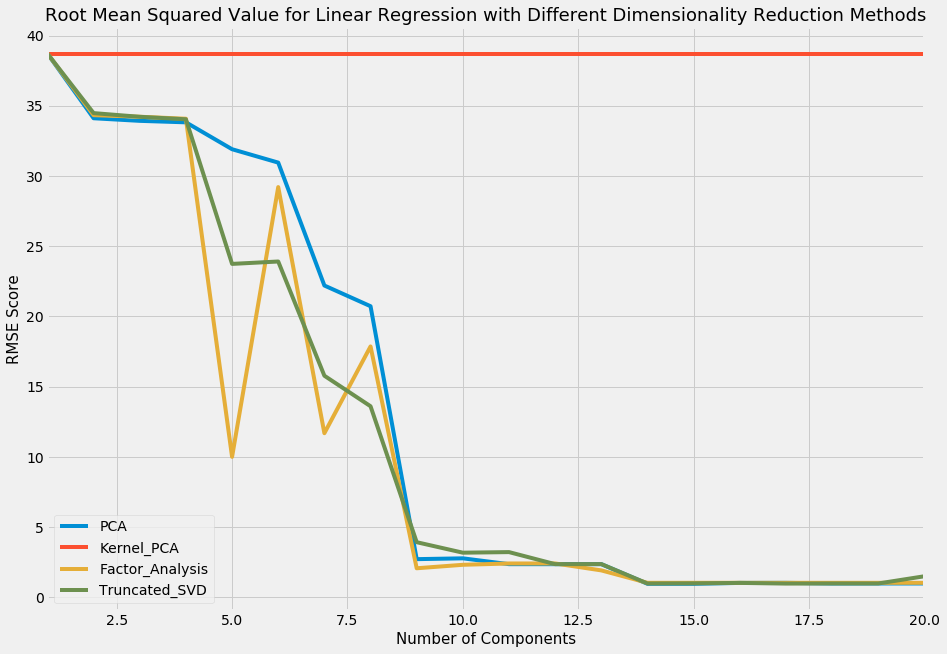

In [44]:
plt.style.use('fivethirtyeight')
plt.subplots(figsize=(14, 10))
for col in dim_red_lr_rmse.columns:
    dim_red_lr_rmse[col].plot(label=col)
plt.legend(loc='best')
plt.ylabel("RMSE Score", size = 15)
plt.xlabel("Number of Components", size = 15)
plt.title("Root Mean Squared Value for Linear Regression with Different Dimensionality Reduction Methods", size = 18)
plt.savefig('dim_red_rmse_lr.png')
plt.show()

Let's also see what the results like with just original variables

In [45]:
X_train.columns

Index(['aroon_down', 'aroon_up', 'aroon_bandwidth', 'bbands_lower',
       'bbands_upper', 'bbandwidth_100', 'cci', 'macd_hist', 'obv', 'rsi',
       'sma_100', 'sma_20', 'stoch', 'today_value', 'crudeoil_open',
       'dollar_open', 'fedfund_open', 'gold_open', 'treasury_3_month',
       'treasury_10_year'],
      dtype='object')

In [46]:
def make_combinations(data):
    num_var = len(data.columns)
    combinations = []
    for i in range(1, num_var + 1):
        for combination in itertools.combinations(data.columns, i):
            combinations.append(combination)
    return combinations
        
column_combinations = make_combinations(X_train)

In [47]:
len(column_combinations)

1048575

In [48]:
# I will make a custom function to iteratively evaluate rmse score for each variable combination

def evaluate_combinations(X_train, y_train, X_validation, y_validation, combinations, model):
    combination_evaluation = {}
    iter_num = 1
    start_time = time.perf_counter()
    for c in combinations:
        model.fit(X_train[list(c)], y_train)
        y_val_pred = model.predict(X_validation[list(c)])
        rmse = np.sqrt(mean_squared_error(y_validation, y_val_pred))
        combination_evaluation[c] = rmse
        iter_num += 1
        if iter_num % 10000 == 0: # We will update the progress every 10000 iterations
            iter_time = time.perf_counter()
            print("Iteration {}: rmse -- {}".format(iter_num, rmse))
            print("Time spent: {} seconds".format(str(round(iter_time - start_time, 2))))
    return combination_evaluation
    

In [49]:
lr = LinearRegression(n_jobs=-1)
combination_evaluation_lr = evaluate_combinations(X_train, y_train, X_validation, y_validation, column_combinations, lr)

Iteration 10000: rmse -- 4.10475559541551
Time spent: 36.12 seconds
Iteration 20000: rmse -- 0.9378478167482082
Time spent: 70.72 seconds
Iteration 30000: rmse -- 1.8007260439907407
Time spent: 104.9 seconds
Iteration 40000: rmse -- 1.530146348005031
Time spent: 139.23 seconds
Iteration 50000: rmse -- 1.4805344974875427
Time spent: 173.42 seconds
Iteration 60000: rmse -- 0.9434058298353638
Time spent: 208.37 seconds
Iteration 70000: rmse -- 3.88185591190317
Time spent: 242.74 seconds
Iteration 80000: rmse -- 2.2837058296480133
Time spent: 277.2 seconds
Iteration 90000: rmse -- 2.699716169433745
Time spent: 311.24 seconds
Iteration 100000: rmse -- 0.9454449349458538
Time spent: 347.64 seconds
Iteration 110000: rmse -- 0.9796119538982582
Time spent: 383.34 seconds
Iteration 120000: rmse -- 1.7625348185694711
Time spent: 418.61 seconds
Iteration 130000: rmse -- 0.9323594309931194
Time spent: 453.88 seconds
Iteration 140000: rmse -- 1.771628464382888
Time spent: 489.6 seconds
Iteration 150

In [51]:
combination_evaluation_lr_df = pd.DataFrame()
combination_evaluation_lr_df["variable_combinations"] = list(combination_evaluation_lr.keys())
combination_evaluation_lr_df["rmse_scores"] = combination_evaluation_lr_df["variable_combinations"].apply(lambda x: combination_evaluation_lr[x])
combination_evaluation_lr_df['combination_num'] = combination_evaluation_lr_df["variable_combinations"].apply(lambda x: len(x))

In [64]:
# We can now see all variable combinations that yield small rmse scores
comb_eval_lr_df_ordered = combination_evaluation_lr_df.sort_values(by="rmse_scores")

In [65]:
comb_eval_lr_df_ordered.head(10)

,variable_combinations,rmse_scores,combination_num
371721,"(aroon_up, bbands_upper, bbandwidth_100, macd_hist, obv, rsi, sma_100, today_value, crudeoil_open)",0.926790,9
563236,"(aroon_up, bbands_upper, bbandwidth_100, macd_hist, obv, rsi, sma_100, today_value, crudeoil_open, treasury_10_year)",0.926804,10
744846,"(aroon_up, bbands_upper, bbandwidth_100, cci, macd_hist, obv, rsi, sma_100, today_value, crudeoil_open, treasury_10_year)",0.926823,11
561640,"(aroon_up, bbands_upper, bbandwidth_100, cci, macd_hist, obv, sma_100, today_value, crudeoil_open, treasury_10_year)",0.926834,10
252381,"(bbands_upper, bbandwidth_100, macd_hist, obv, rsi, sma_100, today_value, crudeoil_open)",0.926867,8
561482,"(aroon_up, bbands_upper, bbandwidth_100, cci, macd_hist, obv, rsi, sma_100, today_value, crudeoil_open)",0.926882,10
422238,"(bbands_upper, bbandwidth_100, macd_hist, obv, rsi, sma_100, today_value, crudeoil_open, treasury_10_year)",0.926886,9
370479,"(aroon_up, bbands_upper, bbandwidth_100, cci, macd_hist, obv, sma_100, today_value, crudeoil_open)",0.926907,9
608710,"(bbands_upper, bbandwidth_100, cci, macd_hist, obv, rsi, sma_100, today_value, crudeoil_open, treasury_10_year)",0.926928,10
420484,"(bbands_upper, bbandwidth_100, cci, macd_hist, obv, rsi, sma_100, today_value, crudeoil_open)",0.926977,9


Very Interesting. The Best model uses 11 variables

In [53]:
lr1 = LinearRegression(n_jobs=-1)
lr1.fit(X_train[list(comb_eval_lr_df_ordered.iloc[0, 0])], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [54]:
y_val_pred = lr1.predict(X_validation[list(comb_eval_lr_df_ordered.iloc[0, 0])])

In [55]:
np.sqrt(mean_squared_error(y_validation, y_val_pred))

0.9267900764765609

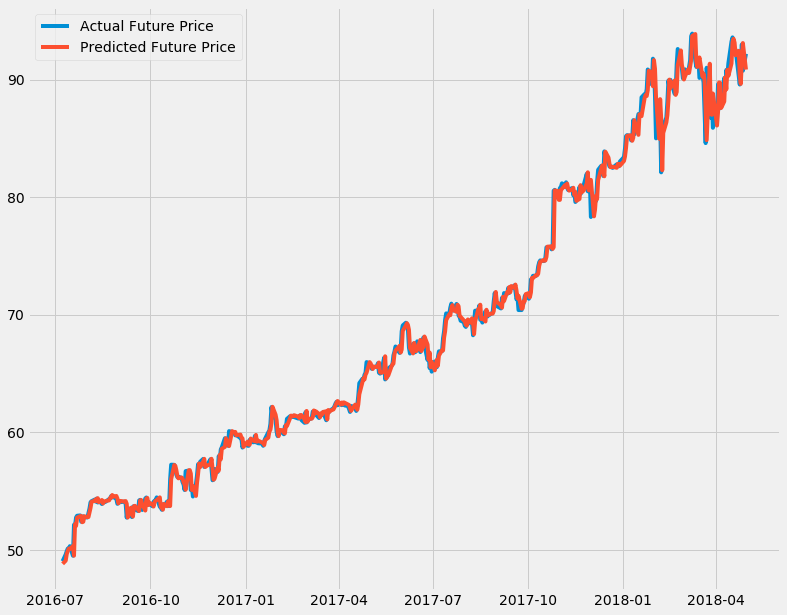

In [56]:
plt.subplots(figsize=(12,10))
plt.plot(y_validation, label="Actual Future Price")
plt.plot(pd.Series(y_val_pred, index=y_validation.index), label="Predicted Future Price")
plt.legend()

In [66]:
# Let's see how the baseline model performs
np.sqrt(mean_squared_error(y_validation, X_validation["today_value"]))

0.9330491864067968

#### The Linear Regression Model outperforms the baseline model, but barely

### Let's try this variable combination to see how it performs on the test set

In [57]:
lr2 = LinearRegression(n_jobs=-1)
lr2.fit(X_train[list(comb_eval_lr_df_ordered.iloc[0, 0])], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [58]:
y_test_pred = lr2.predict(X_test[list(comb_eval_lr_df_ordered.iloc[0, 0])])

In [59]:
np.sqrt(mean_squared_error(y_test, y_test_pred))

1.762316634245301

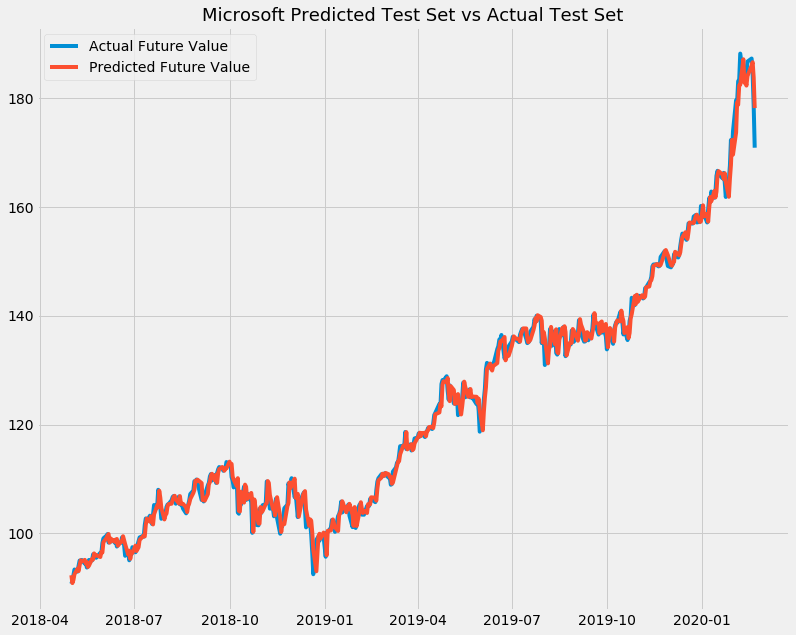

In [63]:
plt.subplots(figsize=(12,10))
plt.plot(y_test, label="Actual Future Value")
plt.plot(pd.Series(y_test_pred, index=y_test.index), label="Predicted Future Value")
plt.legend()
plt.title("Microsoft Predicted Test Set vs Actual Test Set", size=18)
plt.savefig("MSFT_test_prediction.png")
plt.show()

In [67]:
# Just to test the baseline, let's see how the baseline model performs
np.sqrt(mean_squared_error(y_test, X_test["today_value"]))

1.7789368799513028

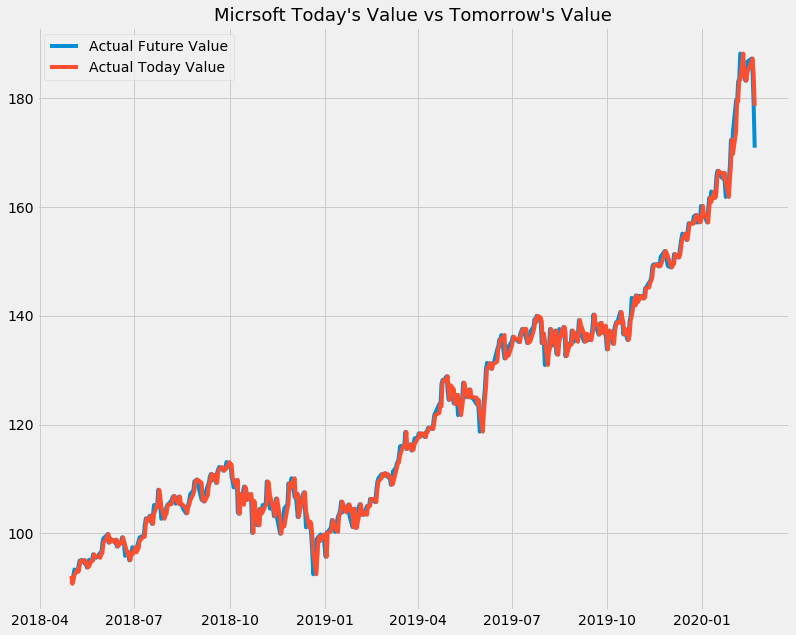

In [68]:
plt.subplots(figsize=(12,10))
plt.plot(y_test, label="Actual Future Value")
plt.plot(pd.Series(X_test["today_value"]), label="Actual Today Value")
plt.title("Micrsoft Today's Value vs Tomorrow's Value", size=18)
plt.legend()
plt.savefig("MSFT_baseline_model.png")

We can't really know if the linear model is doing substantially better than copying today's value or not

## For the next step, we need to look at residuals to see if there are ways to further improve the model